In [2]:
#상자수염 : 데이터의 불균형을 알기 쉽게 표현하는 그래프 ax.boxplot()

#용어 설명
 # 벗어난 값 : 수염의 하부 끝~상부 끝 이외(아웃라이어)
 # IQR : 사분위 범위
 # 수염 상부 끝 / 수염 하부 끝
 # 제1사분위점 : 모든 데이터의 하위부터 1/4(=Q1), 상자의 하부 끝. 
 # 중앙값 : 모든 데이터의 하위부터 1/2로 나눈 값 (=2사분위점)
 # 제3사분위점 : 모든 데이터의 하위부터 3/4로 나눈 값(=Q3), 상자의 상부 끝


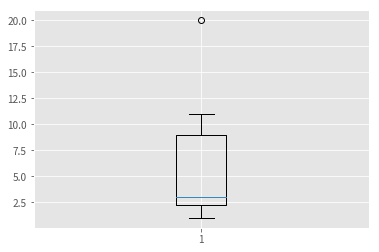

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

x = [1,2,3,3,11,20]
fig=plt.figure()

ax = fig.add_subplot(111)
ax.boxplot(x)

plt.show()

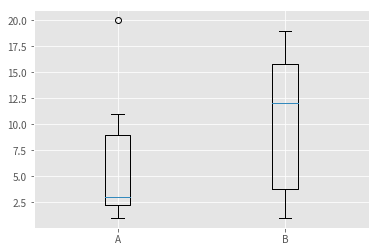

In [8]:
#여러개의 상자수염 그래프

#복수의 리스트 세트
x = [[1,2,3,3,11,20], [1,2,9,19,15,16]]
labels = ['A','B']

fig=plt.figure()
ax = fig.add_subplot(111)


#데이터와 레이블 지정
ax.boxplot(x, labels=labels)
plt.show()    

In [9]:
#상자수염 그래프 활용

import os
import pandas as pd

anime_master_csv = './anime/anime_master.csv'

df = pd.read_csv(anime_master_csv, index_col = 'anime_id')
df.head(3)

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


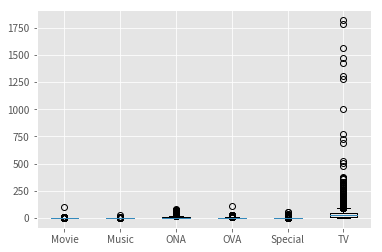

In [10]:
#배급 종별마다 에피소드 수 시각화

labels=[]
types_list=[]

for label, df_per_type in df.groupby('type'):
    labels.append(label)
    types_list.append(df_per_type['episodes'].tolist())
    
fig=plt.figure()
ax = fig.add_subplot(111)

ax.boxplot(types_list, labels=labels)

plt.show()